<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_KMeanVsTfIDf_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: K-Mean Vs TF-IDF
###AUTHOR: Sheida Talei

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [ ]:
# !pip install --target=$nb_path wordcloud-fa

Processing /root/.cache/pip/wheels/37/dd/e9/d6d14e3faa089ffa1bc80ae6f713ca91d2ffd0bb786edcdef5/wordcloud_fa-0.1.8-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f6/e7/f4ed7fac1993615b4ba92f473a77e27a3d210c5d23a000c2c98846963f9a/wordcloud-1.7.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1/arabic_reshaper-2.1.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/b0/f942d146a2f457233baaafd6bdf624eba8e0f665045b4abd69d1b62d097d/python_bidi-0.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/22/13/5a7074bc11d20dbbb46239349ac3f85f7edc148b4cf68e9b8c2f8263830c/hazm-0.7.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab/libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl
Processing /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c/nltk-3.3-cp36-non

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from kneed import KneeLocator
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud_fa import WordCloudFa
from persian_wordcloud.wordcloud import PersianWordCloud

In [ ]:
from hazm import *

In [ ]:
def tokenization (X):
    tokenized_train_data = []
    for item in range(len(X)):
        var = word_tokenize(X[item])
#         var.append(Y[item])
        tokenized_train_data.append(var)
        
    return tokenized_train_data    

In [ ]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['tweet'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [ ]:

# X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/WightedTweets.csv')
# Y= X_and_Y.Label
# X = X_and_Y.text
X = X_and_Y.tweet


In [ ]:
Y = X_and_Y.Weight

In [ ]:

list_x_and_y = tokenization (X) 

In [ ]:
print(list_x_and_y[0])

['#هست']


In [ ]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [ ]:
persian_stop_word = list(getStopWord())


In [ ]:
vectorizer = TfidfVectorizer(stop_words= persian_stop_word ,  max_features = 2000 , ngram_range=(1,4) ) 
X_train_vector  = vectorizer.fit_transform(X)

In [ ]:
#source: https://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
svd = TruncatedSVD(n_components=200)
X_svd = svd.fit_transform(X_train_vector)

In [ ]:
#source: https://towardsdatascience.com/k-means-clustering-with-python-code-explained-5a792bd19548
# num_cluster = 1000
# kmean=KMeans(n_clusters=num_cluster)
# kmean.fit(X_svd)
# labels = kmean.labels_
# silhoute = metrics.silhouette_score(X_svd, labels, metric='euclidean')
# print("silhouette_score is: ",silhoute)

In [ ]:
# centroids = kmean.cluster_centers_
# print(centroids.shape)

(150, 200)


In [ ]:
#Source: https://stackoverflow.com/questions/26450673/sklearn-decomposition-top-terms
# weights = np.dot(kmean.cluster_centers_, svd.components_)

In [ ]:
# weights.shape

# Confusion Matrix

In [ ]:
# #this functon calculates cos theta between two vectors
def similarity (vector_a, vector_b):
  ma = np.linalg.norm(vector_a)
  mb = np.linalg.norm(vector_b)
  sim = (np.matmul(vector_a,vector_b))/(ma * mb)
  return sim


In [ ]:
num_cluster = kmean.n_clusters
centroid_matrix = np.zeros((num_cluster,num_cluster))
centroids = kmean.cluster_centers_

In [ ]:

for i in range(num_cluster):
  for j in range(num_cluster):
    centroid_matrix[i][j] = similarity(centroids[i], centroids[j])


In [ ]:
# print(centroid_matrix)

In [ ]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
# df_cm = pd.DataFrame(centroid_matrix, range(1,num_cluster+1), range(1,num_cluster+1))
# plt.figure(figsize = (200,140))
# # sn.color_palette("vlag", as_cmap=True)
# plot = sn.heatmap(df_cm, annot=True, cmap="coolwarm")
# plot.figure.savefig("/content/drive/MyDrive/Final/output_250.png")

In [ ]:
# # # true_k=3
# # #Source: https://pythonprogramminglanguage.com/kmeans-text-clustering/
# text = ""
# print("Top terms per cluster:")
# order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()

# for i in range(kmean.n_clusters):
#   print("Cluster %d:" % i),
#   for ind in order_centroids[i, :1000]:

#     # print(len(terms))
#     text +=  terms[ind] + " "

#       # print(' %s' % terms[ind])
#   text =  text.replace("gt", "")
#   print(text)
#   draw_cloudWord(text, "cloud_tfidf_"+str(i))
#   text = ""
#   print

##word cloud

In [ ]:
#source: https://www.datacamp.com/community/tutorials/wordcloud-python
#https://pypi.org/project/wordcloud-fa/
def draw_cloudWord(text, fileName, frequencies):

  wordcloud = WordCloudFa(no_reshape=False,  include_numbers=False, collocations=False, width=800, height=400,background_color="white")
  # wc = wordcloud.generate(text)
  frequencies = wordcloud.process_text(text)
  wc = wordcloud.generate_from_frequencies(frequencies)
  image = wc.to_image()
  image.show()
  image.save('/content/drive/MyDrive/Final/cloudFolderFrequency70_1/'+fileName +".png")



In [ ]:
def writeToFile(word, weight,  fileName, lastFileName):
    X_and_Y = pd.read_csv(fileName , encoding="utf-8")
    text = ''
    counter = 0
    for item in input_list:
        for i in range(len(item)):
            text += list(item)[i] + ' '
        print(counter)    
        X_and_Y.loc [counter, 'text'] = text.strip()
        X_and_Y.to_csv(lastFileName ,index=False, encoding='utf-8-sig')
        counter = counter + 1
        text =''

In [ ]:
# features = vectorizer.get_feature_names()
# file = pd.read_csv("/content/drive/MyDrive/Final/TF_IDF_00.csv" , encoding="utf-8")
# counter = 0
# centroids = kmean.cluster_centers_
# text = ""
# weights = np.abs(centroids)
# for i in range(kmean.n_clusters):
#   print("Cluster %d:" % i)
#   file.loc [counter, 'Cluster'] = "Cluster %d:" % i
#   top5 = np.argsort(weights[i])[-50:]
#   for j in top5:
#     text +=features[j].strip() +" "
#     print("Word: "+ features[j] + " weight: "+ str(weights[i][j] ))
#     counter = counter + 1
#     file.loc [counter, 'Word'] = features[j].strip()
#     file.loc [counter, 'Weight'] = weights[i][j]
    
    
#   text =  text.replace("gt", "")
#   print(text)
#   draw_cloudWord(text, "cloud_tfidf_"+str(i))
#   file.to_csv("/content/drive/MyDrive/Final/TF_IDF_00.csv" ,index=False, encoding='utf-8-sig')
#   text = ""


In [ ]:
# features = vectorizer.get_feature_names()
file = pd.read_csv("/content/drive/MyDrive/Final/TF_IDF_Frequency_70_1.csv" , encoding="utf-8")
counter = 0
#each row == each tweet
distances = kmean.transform(X=X_svd)
print(distances.shape)
centroids = kmean.cluster_centers_
text = ""
# weights = np.abs(centroids)
for i in range(kmean.n_clusters):
  print("Cluster %d:" % i)
  file.loc [counter, 'Cluster'] = "Cluster %d:" % i
  top5 = np.argsort(distances[:, i])[0:49] 

  for j in top5:
    print(j)
    index = list_x_and_y[j]
    
    for word in range(len(index)):
      
      text +=index[word].strip() +" "
 
      print("Word: "+ index[word] + " distance: "+ str(distances[j][i] ))
      counter = counter + 1
      file.loc [counter, 'Word'] = index[word]
      file.loc [counter, 'Weight'] = distances[j][i]
    
    
    text =  text.replace("gt", "")
    print(text)
  draw_cloudWord(text, "cloud_tfidf_"+str(i),Y[i])
  file.to_csv("/content/drive/MyDrive/Final/TF_IDF_Frequency_70_1.csv" ,index=False, encoding='utf-8-sig')
  text = ""

Streaming output truncated to the last 5000 lines.
Word: کوچیکه distance: 0.33501791746147597
Word: هرکس distance: 0.33501791746147597
Word: کجا distance: 0.33501791746147597
Word: وگرنه distance: 0.33501791746147597
Word: امارشو distance: 0.33501791746147597
Word: درمیارن distance: 0.33501791746147597
Word: نمیتونه… distance: 0.33501791746147597
Word: میدونم distance: 0.33501791746147597
غذا ضحاک وعده باز مار ی گرفته💔😭 عزا باز سامرا اوست》 《سلامت باز کرامت اهت… سلامت ز اوست علی حمد ارد کف لوا امامت افاق مستضعفین باز کاووس پاسخ ز چنین تهمتن #هست بی نیاز اورد باز خویش اصل میگردیم مشت باز پرده ز خیال زطوق کن هلال برج صفر نکنه شوکر ببافین دختره چاقو ماشین دروغ خجالت تینر نکشین مادرجنده تانک باخت#باز منع اربعین تاکید رهبر فضا ضوابط باز راهپیما توصیف استدلال سفر طرفدار همکار اعلام سخنران تجمع مشهد متدین پایبند متدینین علنی باز روز می کردم تحلیل های مونده اشکارا بی بی سی اخبار دهنم این قدر ت… زننده باز علنی روز می کردم تحلیل های مونده بی بی سی اخبار تب… دهنم این قدر کارکن عربستان النصر ابی وت

In [ ]:
# y_kmeans = kmean.predict(X_train_vector)

In [ ]:
#we can see our three centers by using the following command
# kmean.cluster_centers_

In [ ]:
#To check the labels created, we can use the following command. It gives the labels created for our data
# kmean.labels_

In [ ]:
#Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:
# kmean.inertia_

In [ ]:
# frame = pd.DataFrame(X_train_vector)
# frame['cluster'] = y_kmeans
# frame['cluster'].value_counts()

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
#source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#source:https://realpython.com/k-means-clustering-python/
SSE = []
SIL = []

clusterList = [22, 70, 100,150,200,250,300,350,400,500,700,1000]
for cluster in clusterList:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_svd,sample_weight=Y)
    SSE.append(kmeans.inertia_)
    labels = kmeans.labels_
    SIL.append(metrics.silhouette_score(X_svd, labels, metric='euclidean'))
    # clusterList.append(cluster)
    print (cluster)
    # cluster = cluster + 10

# converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('silhouette_score')

/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


22


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


70


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


100


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


150


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


200


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


250


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


300


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


350


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


400


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


500


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


700


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


1000


In [ ]:
 
# clusterList = [100,  500,1000,2000,3000,3500,4000,4500,5000]
# frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('silhouette_score')

Text(0, 0.5, 'silhouette_score')

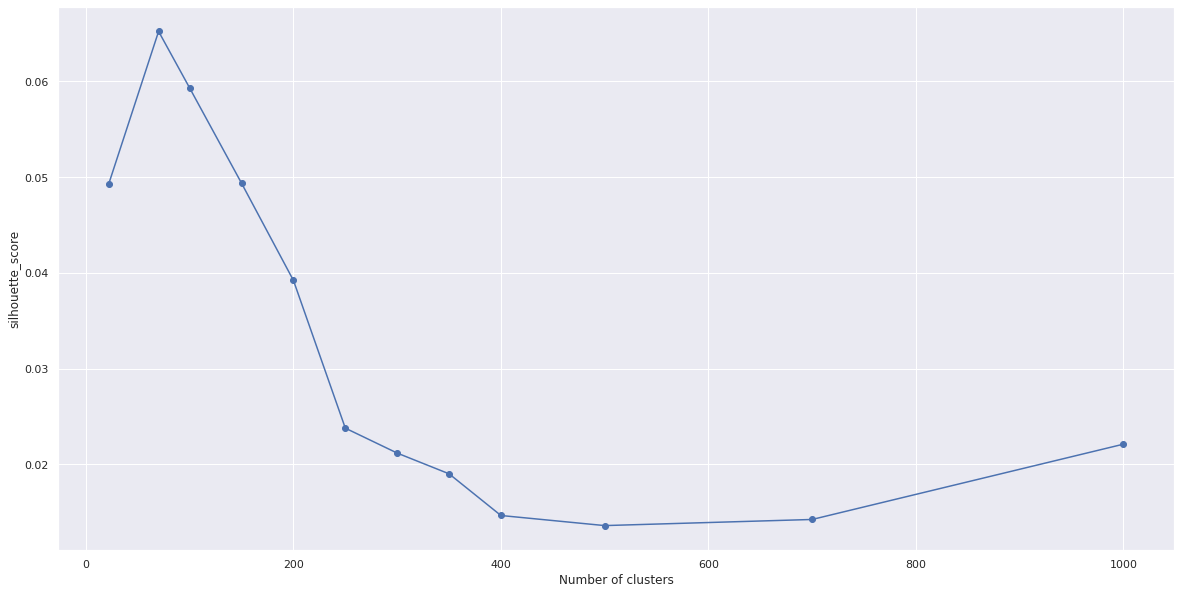

In [ ]:
# print(len (SSE))
frame = pd.DataFrame({'Cluster':clusterList, 'SIL':SIL})
plt.figure(figsize=(20,10))
plt.plot(frame['Cluster'], frame['SIL'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'Inertia')

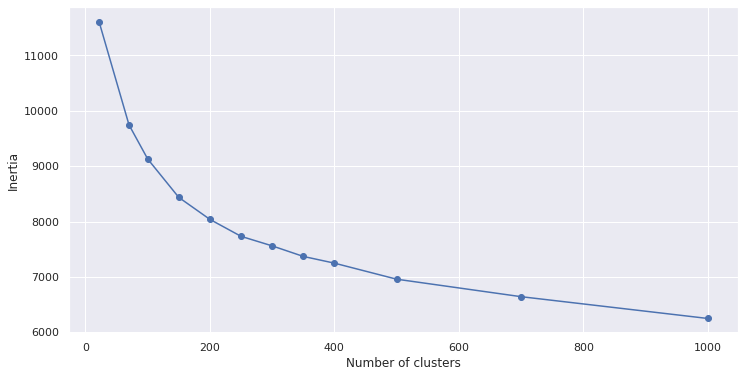

In [ ]:
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kl = KneeLocator(clusterList, SSE, curve="convex", direction="decreasing")
true_k = kl.elbow
print (true_k)

250


In [ ]:
true_k = 70
kmean=KMeans(n_clusters=true_k)
kmean.fit(X_svd,sample_weight=Y)

KMeans(n_clusters=70)

In [ ]:
labels = kmean.labels_
print(metrics.silhouette_score(X_svd, labels, metric='euclidean'))

0.03239395826411704


In [ ]:
# true_k=3
#Source: https://pythonprogramminglanguage.com/kmeans-text-clustering/
# print("Top terms per cluster:")
# order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :50]:
#         print(' %s' % terms[ind]),
#     print

In [ ]:
# labels=kmean.labels_

In [ ]:

# silhouette_score = metrics.silhouette_score(X_train_vector, labels, metric='euclidean')
# print ("Silhouette_score: ",silhouette_score )


# Give weight to each tweet based on freqency

In [ ]:
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
X = X_and_Y.text
sorted_tweets_list = sorted(X)
# dictionary = dict()



In [ ]:
def word_count(sorted_tweets_list):
  # file = pd.read_csv("/content/drive/MyDrive/Final/WightedTweets.csv" , encoding="utf-8")
  # counter = 0 
  dictionary = dict()
  for text in sorted_tweets_list:
    print(text)
    tweet = text.strip()
    key = tweet
    if key in dictionary.keys():
      dictionary[key] += 1
      
      # file.loc [counter, 'Weight'] = dictionary[key]
  
    else:
      
      dictionary[key] = 1
      # file.loc [counter, 'tweet'] = tweet
      # file.loc [counter, 'Weight'] = dictionary[key]
      # counter = counter + 1 
      
  return dictionary
    # file.to_csv("/content/drive/MyDrive/Final/WightedTweets.csv" ,index=False, encoding='utf-8-sig')
  

In [ ]:
dictionary = word_count(sorted_tweets_list)

Streaming output truncated to the last 5000 lines.
چشید#چش از حال خوب نداره مراقبت شه خوبه الان خبر دختر
چطور رفیق ژان
چغچغی😂😂😂
چقد داشت#دار دوست منو
چقد میاد ب نگرفتن هستن صداشون وقت ک… قلب درد میکنم بود#باش فکر ازشون ک فیلم دختر
چقد میتونه بیشتر هستن مغز ادم اعصابمو چی… بیشرف امید داغون عرزشی نفهم ویدیو
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
here
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
here
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
here
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
here
چقد نابود نمیده مرد حیوونید گفت#گو داس روح دستمال درد دید#بین میکنم میمیره جواب جسمشو خب جسم میکنیم میدیم
here
چقدر احتمال انتقال ناقل علامت
چق

In [ ]:
file = pd.read_csv("/content/drive/MyDrive/Final/WightedTweets.csv" , encoding="utf-8")
counter = 0 
for key in dictionary.keys():
  file.loc [counter, 'tweet'] = key
  file.loc [counter, 'Weight'] = dictionary[key]
  print(counter)
  counter += 1
  
  file.to_csv("/content/drive/MyDrive/Final/WightedTweets.csv" ,index=False, encoding='utf-8-sig')


Streaming output truncated to the last 5000 lines.
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
2